<a href="https://colab.research.google.com/github/florestony54/Eth_vs_Btc/blob/main/Eth_vs_Btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A case to buy Ethereum over Bitcoin

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import scipy.stats
from statsmodels.tsa.stattools import grangercausalitytests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and preprocessing data

In [ ]:
btc = pd.read_csv('/content/drive/MyDrive/Bitcoin.csv')
eth = pd.read_csv('/content/drive/MyDrive/Ether.csv')

In [ ]:
btc

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2017-01-04,1140.385000,1047.099990,1141.997500,1047.063750
1,BTC,2017-01-05,985.938750,1140.385000,1153.020000,887.466250
2,BTC,2017-01-06,837.836250,985.938750,990.371250,821.655000
3,BTC,2017-01-07,923.523750,837.836250,923.747500,816.363750
4,BTC,2017-01-08,889.338750,923.523750,942.062500,878.101250
...,...,...,...,...,...,...
1448,BTC,2021-01-01,29333.605121,28935.810981,29601.594898,28753.412314
1449,BTC,2021-01-02,32154.167363,29353.640608,33064.673534,29012.927887
1450,BTC,2021-01-03,33002.536427,32074.106611,34452.080337,31885.581619
1451,BTC,2021-01-04,31431.612280,32788.583453,33358.399346,28154.110298


In [ ]:
eth

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2017-01-04,11.445979,10.435576,11.551621,10.261253
1,ETH,2017-01-05,9.956588,11.445979,11.551746,9.333461
2,ETH,2017-01-06,9.737254,9.956588,10.356583,9.476354
3,ETH,2017-01-07,10.001896,9.737254,10.161477,9.550739
4,ETH,2017-01-08,10.266545,10.001896,10.482916,9.917815
...,...,...,...,...,...,...
1448,ETH,2021-01-01,730.035168,736.709922,749.059799,721.920981
1449,ETH,2021-01-02,771.475757,729.732567,784.506031,716.225886
1450,ETH,2021-01-03,976.892681,771.794228,989.551795,765.723864
1451,ETH,2021-01-04,1017.862399,971.642719,1151.069389,890.473806


Bitcoin and Ethereum data between 1-1-2017 and 1-5-2021

In [ ]:
btc_data = numpy.genfromtxt('/content/drive/MyDrive/Bitcoin.csv', delimiter=",")
eth_data = numpy.genfromtxt('/content/drive/MyDrive/Ether.csv', delimiter=",")

## Visualizing crypto prices since Jan-2017

Text(0.5, 1.0, 'Ethereum')

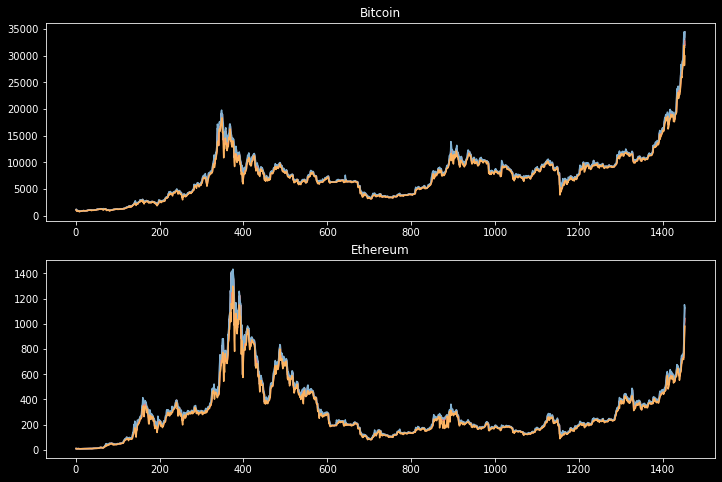

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.subplot(2,1, 1)
plt.plot(btc_data)
plt.title("Bitcoin")
plt.subplot(2,1,2)
plt.plot(eth_data)
plt.title("Ethereum")

In [ ]:
btc_close = btc['Closing Price (USD)']
eth_close = eth['Closing Price (USD)']


## Visualizing the Number of days above 55, 70, 80% of the rounded all-time high as of Jan-6-21

Here I used the all-time highs for each crypto as of 1-6-21. I would not be surprised if these values changed in the near future. With respect to the all-time highs, let's visualize how many days each cryptocurrency has spent at or above 55%, 70%, and 80% of the current ATH.

Text(0.5, 1.0, 'Days where a cryptocurrency was at or above X % of all time high')

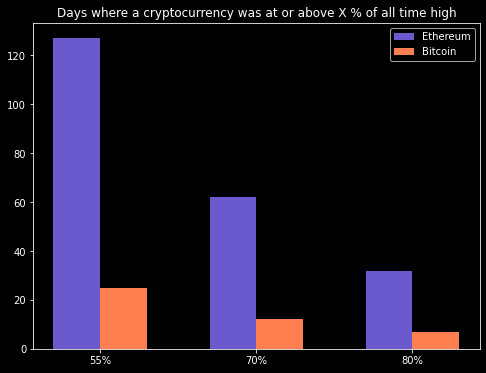

In [304]:
btc_ath = 35000
eth_ath = 1200

ind = numpy.arange(3)
width = 0.3  

def days_above(percent):
  btc = numpy.where(btc_close > (btc_ath * percent/100))
  eth = numpy.where(eth_close > (eth_ath * percent/100))
  return (len(btc[0]), len(eth[0]))


xlabels = ['55%', '70%', '80%']
eth_height = [days_above(55)[1], days_above(70)[1], days_above(80)[1]]
btc_height = [days_above(55)[0], days_above(70)[0], days_above(80)[0]]
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.bar(ind, eth_height, width,color='slateblue')
plt.bar(ind+width, btc_height, width,color='coral')
plt.legend(['Ethereum', 'Bitcoin'])
plt.xticks(ind + width / 2, xlabels)
plt.title("Days where a cryptocurrency was at or above X % of all time high")


Here when looking at the number of days both cryptocurrencies spent at or above 55% of their all-time highs, we can see Etheruem has roughly 4-5x as many days above this threshold. The 70% and 80% thresholds show Ethereum maintains a similar lead.

Text(0.5, 1.0, 'Days where a cryptocurrency was at or below X % of all time high')

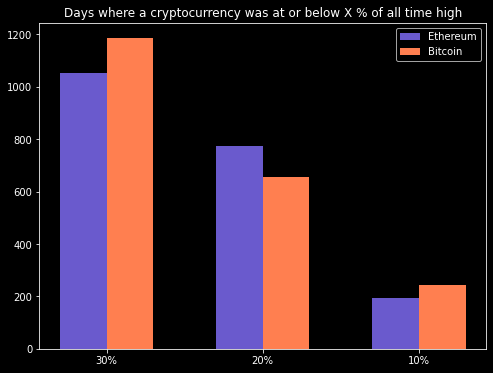

In [305]:
def days_below(percent):
  btc = numpy.where(btc_close < (btc_ath * percent/100))
  eth = numpy.where(eth_close < (eth_ath * percent/100))
  return (len(btc[0]), len(eth[0]))

ind = numpy.arange(3)
width = 0.3  

xlabels = ['30%', '20%', '10%']
eth_height_l = [days_below(30)[1], days_below(20)[1], days_below(10)[1]]
btc_height_l = [days_below(30)[0], days_below(20)[0], days_below(10)[0]]
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.bar(ind, eth_height_l, width, color='slateblue')
plt.bar(ind+width, btc_height_l, width, color='coral')
plt.legend(['Ethereum', 'Bitcoin'])
plt.xticks(ind + width / 2, xlabels)
plt.title("Days where a cryptocurrency was at or below X % of all time high")


The number of days spent at or below these threshold percentages are quite similar for both BTC and ETH. Many more days were spent in these lower percentage price ranges, which can be quickly inferred from the plot of prices from 2017 since higher prices have been sharp spikes followed by sharp declines during shorter time frames.

## Visualizing prices at market close for the past 365 days

Text(0.5, 1.0, 'Ethereum')

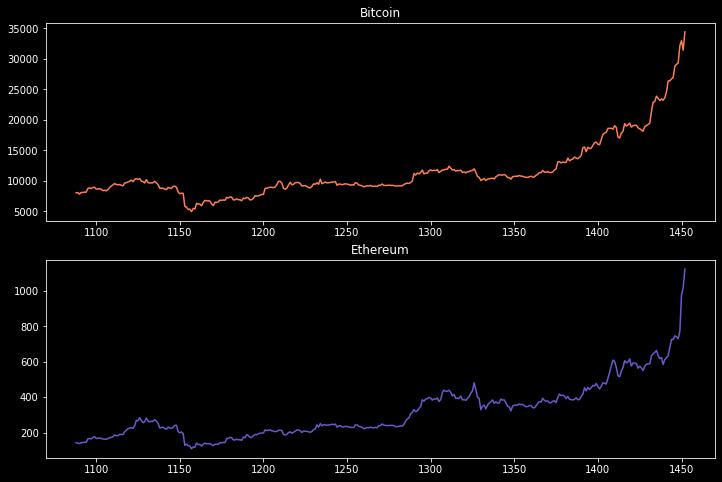

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.subplot(2,1, 1)
plt.plot(btc_close[-365:], color='coral')
plt.title("Bitcoin")
plt.subplot(2,1,2)
plt.plot(eth_close[-365:], color='slateblue')
plt.title("Ethereum")

In [ ]:
btc_yr = list(btc_close[-365:])
eth_yr = list(eth_close[-365:])

btc_yr
start_btc = btc_yr[0]
start_eth = eth_yr[0]
end_btc = btc_yr[-1]
end_eth = eth_yr[-1]

print("In the past 365 days\nBTC percent gain: {:.2f} %\nETH percent gain: {:.2f} %\n-----".format((end_btc/start_btc)*100, 
                                                           (end_eth/start_eth)*100))

print("Past 30 Days\nBTC percent gain: {:.2f} %\nETH percent gain: {:.2f} %".format((end_btc/btc_yr[-30])*100, 
                                                           (end_eth/eth_yr[-30])*100))

In the past 365 days
BTC percent gain: 428.30 %
ETH percent gain: 790.22 %
-----
Past 30 Days
BTC percent gain: 180.21 %
ETH percent gain: 190.48 %


In [309]:
initial_invst = 5000
btc_yr_pctgain = (end_btc/start_btc)
eth_yr_pctgain = (end_eth/start_eth)

btc_yr_gain = initial_invst*btc_yr_pctgain
eth_yr_gain = initial_invst*eth_yr_pctgain

btc_30_pctgain = end_btc/btc_yr[-30]
eth_30_pctgain = end_eth/eth_yr[-30]

btc_30_gain = initial_invst*btc_30_pctgain
eth_30_gain = initial_invst*eth_30_pctgain

print("BTC equity after 30 days: ${:.2f} \nETH equity after 30 days: ${:.2f}".format(btc_30_gain, eth_30_gain))
print("BTC equity after 365 days: ${:.2f} \nETH equity after 365 days: ${:.2f}".format(btc_yr_gain, eth_yr_gain))


BTC equity after 30 days: $9010.45 
ETH equity after 30 days: $9523.77
BTC equity after 365 days: $21414.99 
ETH equity after 365 days: $39510.87


In the past 365 days, we see that Ethereum has grown 790%, whereas Bitcoin has grown 428%. Over the past 30 days Ethereum has grown by an extra 10% relative to Bitcoin. Investing \$5000 in Ethereum 365 days ago would be worth \$39,510, while investing the same amount in Bitcoin would be worth \$21,414. Choosing BTC over ETH could cost the invester over \$18,000!

## Ranges


In [314]:
btc_min = btc_close[numpy.argmin(btc_close)]
btc_max = btc_close[numpy.argmax(btc_close)]
eth_min = eth_close[numpy.argmin(eth_close)]
eth_max = eth_close[numpy.argmax(eth_close)]

btc_range = btc_max - btc_min
eth_range = eth_max - eth_min

btc_pct = (btc_max/btc_min)*100
eth_pct = (eth_max/eth_min)*100

print("BTC Range: {:.2f}\nETH Range: {:.2f}".format(btc_range, eth_range))
print("BTC Percent Gain from Min to Max: {:.2f} %\nETH Percent Gain from min to max: {:.2f} %".format(btc_pct , eth_pct))

9.401194
1405.21
BTC Range: 33660.95
ETH Range: 1395.81
BTC Percent Gain from Min to Max: 4456.49 %
ETH Percent Gain from min to max: 14947.14 %


## Analyzing Correlation

Pearson, Spearman, and Kendall correlation coefficients calculated for ETH and BTC

In [ ]:
pearson = scipy.stats.pearsonr(btc_close, eth_close)
pearson_c, pearson_p = pearson[0], pearson[1]
spearman = scipy.stats.spearmanr(btc_close, eth_close)
spearman_c, spearman_p = spearman[0], spearman[1]
kendall = scipy.stats.kendalltau(btc_close, eth_close)
kendall_c, kendall_p = kendall[0], kendall[1]

coefficients = (pearson_c, pearson_p, spearman_c, spearman_p, kendall_c,kendall_p)

print(" Pearson: corr={:.4f} p={:.2e} \n Spearman: corr={:.4f} p={:.2e} \n Kendall: corr={:.4f} p={:.2e}".format(*coefficients))

 Pearson: corr=0.6176 p=1.55e-153 
 Spearman: corr=0.6502 p=2.35e-175 
 Kendall: corr=0.4936 p=8.11e-175


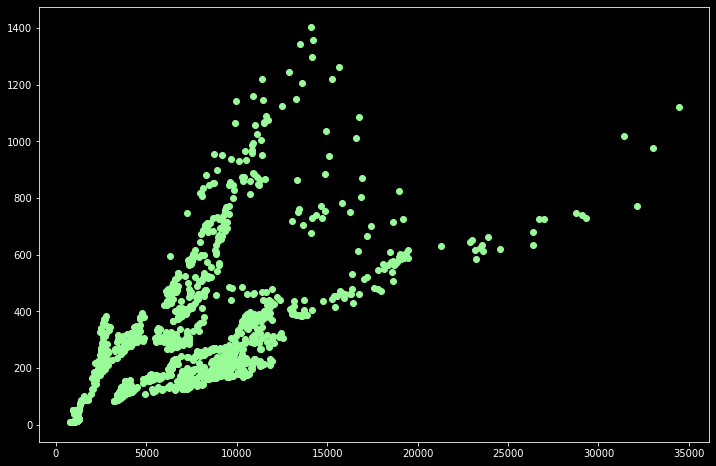

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.scatter(btc_close, eth_close, color='palegreen')

While there is clearly some correlation, it seems to be split. Let's analyze correlation over different time frames.

Pearson Correlation results (Coefficient, p-value)
-------
Correlation between BTC-ETH Q1: 0.89 p=1.463e-101
Correlation between BTC-ETH Q2: 0.63 p=4.058e-34
Correlation between BTC-ETH Q3: 0.76 p=1.247e-131
Correlation between BTC-ETH Q4: 0.96 p=2.281e-84
Overall correlation over this timeframe: 0.62 p=1.552e-153


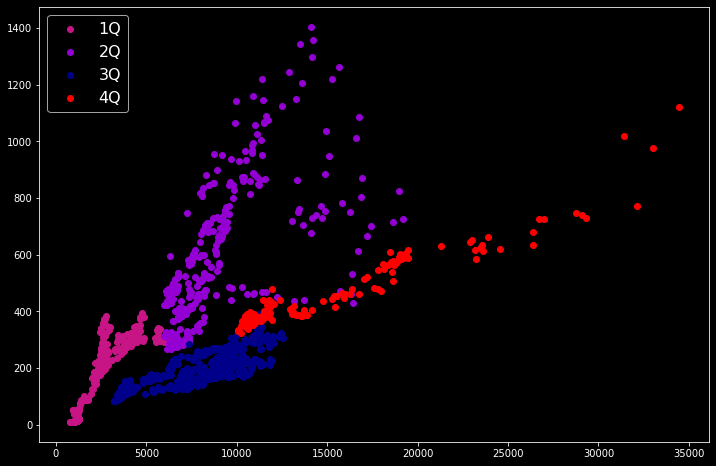

In [ ]:
corr_1q = scipy.stats.pearsonr( eth_close[0:300], btc_close[0:300])
corr_2q = scipy.stats.pearsonr( eth_close[301:600], btc_close[301:600]) 
corr_3q = scipy.stats.pearsonr( eth_close[601:1300], btc_close[601:1300])
corr_4q = scipy.stats.pearsonr( eth_close[1301:], btc_close[1301:])
corr_all = scipy.stats.pearsonr( eth_close, btc_close)

plt.style.use('dark_background')
plt.figure(figsize=(12,8))
corr_plt = plt.subplot(111)
corr_plt.scatter(btc_close[0:300], eth_close[0:300], c='mediumvioletred')
corr_plt.scatter(btc_close[301:600], eth_close[301:600], c='darkviolet')
corr_plt.scatter(btc_close[601:1300], eth_close[601:1300], c='darkblue')
corr_plt.scatter(btc_close[1301:], eth_close[1301:], c='red')
corr_plt.legend(["1Q", "2Q", "3Q", "4Q"], prop={'size': 16})

print("Pearson Correlation results (Coefficient, p-value)\n-------")
print("Correlation between BTC-ETH Q1: {:.2f} p={:.3e}".format( corr_1q[0], corr_1q[1]))
print("Correlation between BTC-ETH Q2: {:.2f} p={:.3e}".format(corr_2q[0], corr_2q[1] ))
print("Correlation between BTC-ETH Q3: {:.2f} p={:.3e}".format( corr_3q[0], corr_3q[1]))
print("Correlation between BTC-ETH Q4: {:.2f} p={:.3e}".format(corr_4q[0], corr_4q[1]))
print("Overall correlation over this timeframe: {:.2f} p={:.3e}".format(corr_all[0], corr_all[1]))

## Analyzing Volatility as measured by standard deviation

Average Volatility since Jan-2017 with a rolling 2 day window

In [ ]:
btc['volatility-close'] = (btc['Closing Price (USD)'].rolling(window=2).std(ddof=0))*(252**0.5)
eth['volatility-close'] = (eth['Closing Price (USD)'].rolling(window=2).std(ddof=0))*(252**0.5)
btc_vol = btc['volatility-close'].sum()/btc['volatility-close'].count()
eth_vol = eth['volatility-close'].sum()/eth['volatility-close'].count()

print("BTC Volatility since 1/5/2017: {:.2f}\nETH Volatility since 1/5/2017: {:.2f}".format(btc_vol, eth_vol))

BTC Volatility since 1/5/2017: 1780.02
ETH Volatility since 1/5/2017: 101.23


Pearson correlation coefficient: 0.6701


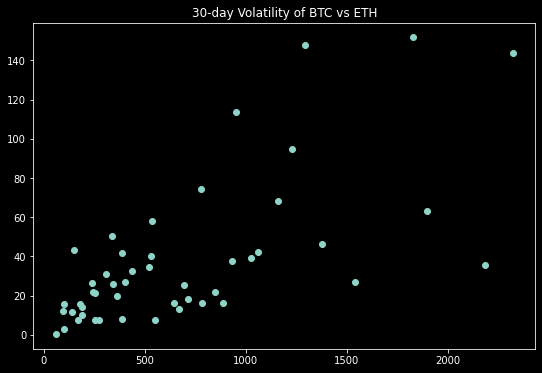

In [ ]:
plt.figure(figsize=(9,6))
plt.style.use('dark_background')
plt.scatter(btc_vol_30, eth_vol_30)
plt.title("30-day Volatility of BTC vs ETH")

pearson_corr = scipy.stats.pearsonr( eth_vol_30[1:], btc_vol_30[1:])
print("Pearson correlation coefficient: {:.4f}".format(pearson_corr[0]))

## Correlation Between ETH and BTC During Highest Volatility Months

In [ ]:
btc['volatility-close-30'] = btc['Closing Price (USD)'].rolling(window=30).std()
eth['volatility-close-30'] = eth['Closing Price (USD)'].rolling(window=30).std()

btc_vol_30 = btc['volatility-close-30'].iloc[ btc['volatility-close-30'].index % 30 == 0]
eth_vol_30 = eth['volatility-close-30'].iloc[ eth['volatility-close-30'].index % 30 == 0]

btc_top10_vol = btc_vol_30.sort_values(na_position='first')[-10:]
eth_top10_vol = eth_vol_30.sort_values(na_position='first')[-10:]
btc_bot10_vol = btc_vol_30.sort_values(na_position='last')[:10]
eth_bot10_vol = eth_vol_30.sort_values(na_position='last')[:10]


Text(70, 11, 'corr = 0.88')

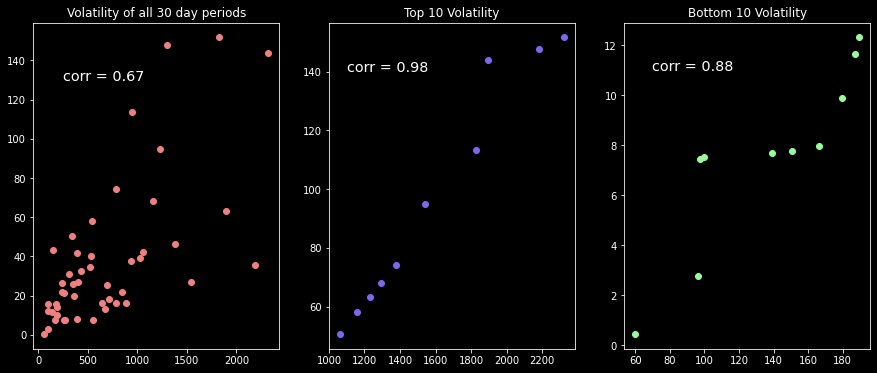

In [ ]:
bot_10_corr = round(scipy.stats.pearsonr( eth_bot10_vol, btc_bot10_vol)[0], 2)
top_10_corr = round(scipy.stats.pearsonr( eth_top10_vol, btc_top10_vol)[0], 2)
corr_30_days = round(scipy.stats.pearsonr( eth_vol_30[1:], btc_vol_30[1:])[0],2)


plt.figure(figsize=(15,6))
plt.style.use('dark_background')
plt.subplot(1, 3, 1)
plt.title("Volatility of all 30 day periods")
plt.scatter( btc_vol_30, eth_vol_30, c='lightcoral')
plt.text(250, 130,  "corr = " + str(corr_30_days), fontsize='x-large')
plt.subplot(1, 3, 2)
plt.title("Top 10 Volatility")
plt.scatter(btc_top10_vol, eth_top10_vol, c='mediumslateblue')
plt.text(1100, 140,  "corr = " + str(top_10_corr), fontsize='x-large')
plt.subplot(1, 3, 3)
plt.title("Bottom 10 Volatility")
plt.scatter(btc_bot10_vol, eth_bot10_vol, c='palegreen')
plt.text(70, 11,  "corr = " + str(bot_10_corr), fontsize='x-large')

Months with the highest volatility have, a very linear relationship. In contrast, overall the linearity weakens when volatility is not as high. Interestingly, the 30-day periods with the lowest volatility have a strong linear relationship. It seems that large spikes in one cryptocurrency cause large spikes in the other, while lulls in one have a similar effect on the other.

## Causality Test

In [ ]:
both_close = [btc['Closing Price (USD)'], eth['Closing Price (USD)']]
btc_eth_close = pd.concat(both_close, axis=1)
btc_eth_close

,Closing Price (USD),Closing Price (USD)
0,1140.385000,11.445979
1,985.938750,9.956588
2,837.836250,9.737254
3,923.523750,10.001896
4,889.338750,10.266545
...,...,...
1448,29333.605121,730.035168
1449,32154.167363,771.475757
1450,33002.536427,976.892681
1451,31431.612280,1017.862399


In [ ]:
grangercausalitytests(btc_eth_close, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.4823 , p=0.0007  , df_denom=1449, df_num=1
ssr based chi2 test:   chi2=11.5061 , p=0.0007  , df=1
likelihood ratio test: chi2=11.4607 , p=0.0007  , df=1
parameter F test:         F=11.4823 , p=0.0007  , df_denom=1449, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5935  , p=0.0005  , df_denom=1446, df_num=2
ssr based chi2 test:   chi2=15.2396 , p=0.0005  , df=2
likelihood ratio test: chi2=15.1601 , p=0.0005  , df=2
parameter F test:         F=7.5935  , p=0.0005  , df_denom=1446, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8138  , p=0.0006  , df_denom=1443, df_num=3
ssr based chi2 test:   chi2=17.5259 , p=0.0006  , df=3
likelihood ratio test: chi2=17.4208 , p=0.0006  , df=3
parameter F test:         F=5.8138  , p=0.0006  , df_denom=1443, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8606  , p=0.

{1: ({'lrtest': (11.460737695117132, 0.0007108207720145202, 1),
   'params_ftest': (11.482314227389796, 0.0007214662149452095, 1449.0, 1.0),
   'ssr_chi2test': (11.50608713469086, 0.0006936864737657851, 1),
   'ssr_ftest': (11.482314227387782, 0.000721466214946022, 1449.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (15.160090887678962, 0.0005105380216793409, 2),
   'params_ftest': (7.593524980187151, 0.000524048998228622, 1446.0, 2.0),
   'ssr_chi2test': (15.239563964389347, 0.0004906487896253971, 2),
   'ssr_ftest': (7.593524980188489, 0.0005240489982278935, 1446.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (17.420826723235223, 0.0005789749027874962, 3),
   'params_ftest': (5.813763125755334, 0.0006008139625177355, 1443.0, 3.0),
   'ssr_chi2test': (17.5258971566424, 0.0005508344842484929, 3),
   'ssr_ftest': (5.813763125755169, 0.0006008139625178342, 1443.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

## Analyzing Gains

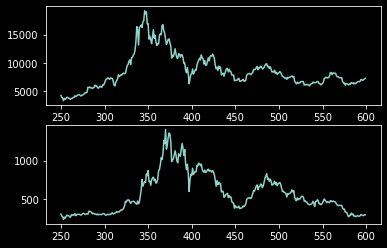

In [ ]:
plt.subplot(211)
plt.plot(btc_close[250:600])
plt.subplot(212)
plt.plot(eth_close[250:600])

In [ ]:
btc_tf_1 = btc_close[250:600]
eth_tf_1 = eth_close[250:600]
btc_peak = numpy.argmax(btc_close[0:600])

def gains(start, end):
  btc_flat = btc_close[end] - btc_close[start]
  btc_pct = (btc_close[end] /btc_close[start])*100
  eth_flat = eth_close[end] - eth_close[start]
  eth_pct = (eth_close[end]/ eth_close[start])*100
  print( "BTC Gain per share: ${:.2f} \nPercent Gain: {:.2f}%".format(btc_flat, btc_pct))
  print( "ETH Gain per share: ${:.2f} \nPercent Gain: {:.2f}%".format(eth_flat, eth_pct))

gains(250, btc_peak)

BTC Gain per share: $14871.22 
Percent Gain: 446.18%
ETH Gain per share: $422.13 
Percent Gain: 239.25%


In [ ]:
print(numpy.argmin(btc_close[1100:]))
print(numpy.argmax(btc_close[1100:]))

57
352


In [ ]:
gains(1157, (1100 + 352))

BTC Gain per share: $29488.90 
Percent Gain: 696.37%
ETH Gain per share: $1015.26 
Percent Gain: 1040.95%
